In [35]:
import pylab as pl
import pandas as pd
import numpy as np
import os
%pylab inline
import os
import json
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
def getCitibikeData(dsNum):
    os.system("curl -O https://s3.amazonaws.com/tripdata/" + dsNum + "-citibike-tripdata.zip")
    print('downloading...')
    os.system("mv " + dsNum + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
    print('moved!')
    os.system("unzip " + os.getenv("PUIDATA") + "/" + dsNum + "-citibike-tripdata.zip")
    print('unzipped!')
    os.system("mv " + dsNum + "-citibike-tripdata.csv " + os.getenv("PUIDATA")) 
    print('unzip moved!')

In [3]:
dsNum = '201610'
getCitibikeData(dsNum)

downloading...
moved!
unzipped!
unzip moved!


In [4]:
ds = os.environ.get('PUIDATA') + '/' + dsNum + '-citibike-tripdata.csv'

In [5]:
citibikedf=pd.read_csv(ds)

In [6]:
citibikedf

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,328,2016-10-01 00:00:07,2016-10-01 00:05:35,471,Grand St & Havemeyer St,40.712868,-73.956981,3077,Stagg St & Union Ave,40.708771,-73.950953,25254,Subscriber,1992.0,1
1,398,2016-10-01 00:00:11,2016-10-01 00:06:49,3147,E 85 St & 3 Ave,40.778012,-73.954071,3140,1 Ave & E 78 St,40.771404,-73.953517,17810,Subscriber,1988.0,2
2,430,2016-10-01 00:00:14,2016-10-01 00:07:25,345,W 13 St & 6 Ave,40.736494,-73.997044,470,W 20 St & 8 Ave,40.743453,-74.000040,20940,Subscriber,1965.0,1
3,351,2016-10-01 00:00:21,2016-10-01 00:06:12,3307,West End Ave & W 94 St,40.794165,-73.974124,3357,W 106 St & Amsterdam Ave,40.800836,-73.966449,19086,Subscriber,1993.0,1
4,2693,2016-10-01 00:00:21,2016-10-01 00:45:15,3428,8 Ave & W 16 St,40.740983,-74.001702,3323,W 106 St & Central Park West,40.798186,-73.960591,26502,Subscriber,1991.0,1
5,513,2016-10-01 00:00:28,2016-10-01 00:09:02,433,E 13 St & Avenue A,40.729554,-73.980572,151,Cleveland Pl & Spring St,40.722104,-73.997249,25800,Subscriber,1995.0,1
6,601,2016-10-01 00:00:51,2016-10-01 00:10:52,3314,W 95 St & Broadway,40.793770,-73.971888,3374,Central Park North & Adam Clayton Powell Blvd,40.799484,-73.955613,15985,Subscriber,1972.0,2
7,563,2016-10-01 00:00:54,2016-10-01 00:10:18,453,W 22 St & 8 Ave,40.744751,-73.999154,485,W 37 St & 5 Ave,40.750380,-73.983390,26018,Subscriber,1984.0,1
8,439,2016-10-01 00:00:54,2016-10-01 00:08:13,534,Water - Whitehall Plaza,40.702551,-74.012723,360,William St & Pine St,40.707179,-74.008873,15374,Subscriber,1968.0,1
9,269,2016-10-01 00:00:54,2016-10-01 00:05:23,471,Grand St & Havemeyer St,40.712868,-73.956981,3077,Stagg St & Union Ave,40.708771,-73.950953,25690,Subscriber,1993.0,2


In [7]:
citibikedf['date'] = pd.to_datetime(citibikedf['Start Time'])

In [8]:
citibikedf['hour']=list(map(lambda x: x.hour, citibikedf.date))

In [9]:
daydf=citibikedf[(citibikedf.hour>=7)&(citibikedf.hour<=19)]
daydf=daydf.reset_index()
daydf=daydf.drop(['index'],axis=1)

In [10]:
nightdf=citibikedf[(citibikedf.hour>19)|(citibikedf.hour<7)]
nightdf=nightdf.reset_index()
nightdf=nightdf.drop(['index'],axis=1)

### Getting rid of all the trips that exceed a trip duration of over 12hrs

In [56]:
hrrange=60*60*12
daydf['tripduration']=daydf['Trip Duration']
nightdf['tripduration']=nightdf['Trip Duration']

In [57]:
reddaydf=daydf[daydf.tripduration<=hrrange]
rednightdf=nightdf[nightdf.tripduration<=hrrange]

In [58]:
print(min(reddaydf.tripduration),max(reddaydf.tripduration))

(61, 42719)


In [59]:
print(min(rednightdf.tripduration),max(rednightdf.tripduration))

(61, 43122)


In [61]:
bins = np.arange(60, 43200, 2000)
D = reddaydf.tripduration.groupby(pd.cut(reddaydf.tripduration, bins)).agg([count_nonzero])

In [62]:
N = rednightdf.tripduration.groupby(pd.cut(rednightdf.tripduration, bins)).agg([count_nonzero])

In [128]:
type(N)

pandas.core.frame.DataFrame

In [63]:
print D

                count_nonzero
tripduration                 
(60, 2060]            1270592
(2060, 4060]            53544
(4060, 6060]             4073
(6060, 8060]             1511
(8060, 10060]             808
(10060, 12060]            570
(12060, 14060]            398
(14060, 16060]            227
(16060, 18060]            145
(18060, 20060]             99
(20060, 22060]             65
(22060, 24060]             58
(24060, 26060]             48
(26060, 28060]             35
(28060, 30060]             26
(30060, 32060]             27
(32060, 34060]             26
(34060, 36060]             16
(36060, 38060]             11
(38060, 40060]             16
(40060, 42060]              9


In [50]:
ks = scipy.stats.ks_2samp(reddaydf.tripduration, rednightdf.tripduration)

### Running the ks test to compare the samples

In [64]:
ks

Ks_2sampResult(statistic=0.07367719228403037, pvalue=0.0)

                count_nonzero
tripduration                 
(60, 2060]           0.016301
(2060, 4060]         0.003055
(4060, 6060]         0.001310
(6060, 8060]         0.000628
(8060, 10060]        0.000250
(10060, 12060]       0.000012
(12060, 14060]       0.000211
(14060, 16060]       0.000353
(16060, 18060]       0.000407
(18060, 20060]       0.000415
(20060, 22060]       0.000414
(22060, 24060]       0.000429
(24060, 26060]       0.000419
(26060, 28060]       0.000396
(28060, 30060]       0.000336
(30060, 32060]       0.000332
(32060, 34060]       0.000301
(34060, 36060]       0.000251
(36060, 38060]       0.000147
(38060, 40060]       0.000080
(40060, 42060]       0.000000


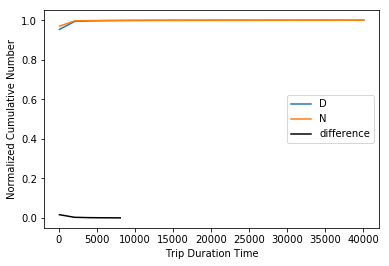

In [65]:
csM=reddaydf.tripduration.groupby(pd.cut(reddaydf.tripduration, bins)).agg([count_nonzero]).cumsum()

csF=rednightdf.tripduration.groupby(pd.cut(rednightdf.tripduration, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "D")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "N")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Trip Duration Time")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

### From this we can infer that the difference between both data sets is close to zero. The null hypothesis would be that the data sets vary significantly which is not the case and so we can reject it.

### Testing Pearson's test for correlation

In [68]:
scipy.stats.pearsonr(D, N)

(array([ 0.99989697]), array([  1.73562358e-36]))

### Again we see a really high correlation and a small p-value wich rejects the null hypothesis

In [70]:
scipy.stats.spearmanr(D, N)

SpearmanrResult(correlation=0.51041709935278634, pvalue=0.01806938647986878)

### Again small p-value

### Assessing the age gap between users in Manhattan and Brooklyn

In [101]:
manhattandf=citibikedf[citibikedf['Start Station Latitude']>=40.699642]

In [102]:
bkdf=citibikedf[citibikedf['Start Station Latitude']<40.699642]

In [103]:
print(len(manhattandf),len(bkdf))

(1429667, 144205)


In [104]:
manhattandf['age']=2017-manhattandf['Birth Year']

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [105]:
bkdf['age']=2017-bkdf['Birth Year']

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [120]:
manhattandf=manhattandf[(manhattandf.age>0)&(manhattandf.age<=100)]

In [121]:
bkdf=bkdf[(bkdf.age>0)&(bkdf.age<=100)]

In [126]:
bins = np.arange(15, 100, 5)
M = manhattandf.age.groupby(pd.cut(manhattandf.age, bins)).agg([count_nonzero])
B = bkdf.age.groupby(pd.cut(bkdf.age, bins)).agg([count_nonzero])

In [127]:
B

,count_nonzero
age,
"(15, 20]",1657.0
"(20, 25]",6599.0
"(25, 30]",22326.0
"(30, 35]",28826.0
"(35, 40]",21036.0
"(40, 45]",16348.0
"(45, 50]",13069.0
"(50, 55]",8109.0
"(55, 60]",5361.0


Ks_2sampResult(statistic=0.06481116049613654, pvalue=0.0)
          count_nonzero
age                    
(15, 20]       0.001703
(20, 25]       0.032705
(25, 30]       0.055669
(30, 35]       0.017889
(35, 40]       0.015112
(40, 45]       0.041090
(45, 50]       0.044236
(50, 55]       0.029849
(55, 60]       0.015441
(60, 65]       0.006408
(65, 70]       0.003479
(70, 75]       0.001245
(75, 80]       0.000298
(80, 85]       0.000040
(85, 90]       0.000024
(90, 95]       0.000000


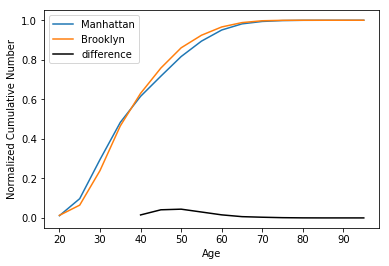

In [132]:
ks = scipy.stats.ks_2samp(manhattandf.age, bkdf.age)
print(ks)
csM=manhattandf.age.groupby(pd.cut(manhattandf.age, bins)).agg([count_nonzero]).cumsum()

csF=bkdf.age.groupby(pd.cut(bkdf.age, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "Manhattan")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "Brooklyn")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

### Both data sets are statiscally similar hence a p-value of 0

### Testing the Pearson's Test

In [133]:
scipy.stats.pearsonr(M, B)

(array([ 0.96851005]), array([  7.57552101e-10]))

### Pearson's test also shows a really small p-value. The age gap among Manhattan and Brooklyn users is negligible

### Testing the Spearman test

In [136]:
scipy.stats.spearmanr(M, B)

SpearmanrResult(correlation=0.98601939865631083, pvalue=2.6979571340262569e-12)

### Spearman's test proves that there is still a very high correlation